# World Health Happiness report from excel sheet at Worldhappinessreport.
The excel sheet includes all data collected. I can filter for the years.
I want to see what years match with kaggle data. 2019 report is available but presumably this data is for 2018
The excel file contains 3 sheets. Table2.1 seems to contain the raw data over the years while Figure2.6 and Figure2.7 contain what seems to be the summary report which matches the Kaggle data.
I will work with the latest 2019 data from Kaggle which matches the Figure2.6 sheet of the Chapter2OnlineData excel file for 2019.
I will be referring to the World Happiness report for more information.

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


In [2]:
!ls data

Chapter2OnlineData.xls                  WHR2018Chapter2OnlineData.xls
Chapter2OnlineData2019.xls              hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


# Reading in data from WHR excel file that matches the Kaggle data.
This is in the sheet named 'Figure2.6'. I have selected only columns from A to K

In [3]:
whr19 = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Figure2.6', usecols='A:K')

In [4]:
whr19.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


I am summing the 'Explained by' columns as the sum of these plus Dystopia plus residuals equals the happiness score.

In [5]:
whr19['Sum of Explained']=whr19.iloc[:,5:].sum(axis=1)
whr19['Sum of Explained + Dystopia']= whr19['Sum of Explained']+whr19['Dystopia (1.88) + residual']
whr19['diff']= whr19['Happiness score']- whr19['Sum of Explained + Dystopia']
whr19.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Sum of Explained,Sum of Explained + Dystopia,diff
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913,5.055180,7.768858,0.000042
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473,5.207202,7.600093,0.000007
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884,5.313126,7.553890,0.000010
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980,5.092708,7.493584,0.000016
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978,5.094730,7.487625,-0.000025


In [6]:
whr19['Happiness score']-whr19['Sum of Explained']

0      2.713720
1      2.392898
2      2.240774
3      2.400892
         ...   
152    0.530607
153    1.793023
154    2.455652
155    1.374347
Length: 156, dtype: float64

In [26]:
whr19.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Sum of Explained,Sum of Explained + Dystopia,diff
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407081,5.512013,5.302148,1.879917,0.905108,1.208793,0.725258,0.392550,0.184840,0.110616,3.527165,5.407082,-0.000001
std,1.113132,1.098555,1.128550,0.528787,0.398357,0.299175,0.242144,0.143320,0.095298,0.094540,0.980135,1.113131,0.000031
min,2.852600,3.004615,2.700585,0.183267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.627348,2.852594,-0.000050
25%,4.544600,4.665040,4.436328,1.512799,0.602895,1.055672,0.548066,0.308071,0.108709,0.047094,2.864185,4.544622,-0.000029
50%,5.379550,5.471402,5.285471,1.916539,0.959741,1.271584,0.788698,0.417316,0.177740,0.085482,3.688714,5.379562,-0.000005
75%,6.184250,6.276417,6.070340,2.267635,1.232124,1.452774,0.881603,0.507297,0.248372,0.141005,4.208374,6.184231,0.000027
max,7.768900,7.829888,7.707912,3.049498,1.684094,1.623651,1.140899,0.631246,0.565825,0.452687,5.455028,7.768858,0.000050


# World Happiness report Table2.1 
From the Chapter2 Online Data excel file for 2019.  
This has additional information over the years that the survey has taken place.

In [7]:
WHR = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1')

In [8]:
WHR.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,...,643.000000,1502.000000,1335.000000,180.000000,125.000000,220.000000,618.000000,491.000000,630.000000,671.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,...,0.370000,0.385438,0.447771,0.226295,0.390480,0.283925,0.249574,0.268070,0.264336,0.237493
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,...,0.083232,0.082396,0.108505,0.119079,0.123309,0.113226,0.118126,0.145120,0.160169,0.157482
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,...,0.240000,0.211000,0.200969,0.066618,0.176535,0.066020,0.048720,0.075872,0.038242,0.031518
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,...,0.305000,0.321429,0.368424,0.139773,0.290300,0.223553,0.176876,0.155833,0.144976,0.118725
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,...,0.352000,0.371000,0.426541,0.198450,0.380174,0.292383,0.229924,0.232000,0.198380,0.193531
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,...,0.428000,0.432200,0.514803,0.281627,0.478149,0.341741,0.294242,0.385469,0.391370,0.335000
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,...,0.634000,0.626000,0.961435,0.640332,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


In [9]:
WHR.isna().sum()

Country name                                          0
Year                                                  0
Life Ladder                                           0
Log GDP per capita                                   28
                                                   ... 
Most people can be trusted, WVS round 1994-1998    1086
Most people can be trusted, WVS round 1999-2004    1213
Most people can be trusted, WVS round 2005-2009    1074
Most people can be trusted, WVS round 2010-2014    1033
Length: 26, dtype: int64

In [10]:
WHR.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

In [11]:
WHR.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
WHR.tail()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
1699,Zimbabwe,2014,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,...,NaN,0.432,0.601080,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1700,Zimbabwe,2015,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,...,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1701,Zimbabwe,2016,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,...,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1702,Zimbabwe,2017,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,...,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1703,Zimbabwe,2018,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,...,NaN,0.432,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [13]:
WHR.dtypes

Country name                                        object
Year                                                 int64
Life Ladder                                        float64
Log GDP per capita                                 float64
                                                    ...   
Most people can be trusted, WVS round 1994-1998    float64
Most people can be trusted, WVS round 1999-2004    float64
Most people can be trusted, WVS round 2005-2009    float64
Most people can be trusted, WVS round 2010-2014    float64
Length: 26, dtype: object

In [14]:
WHR.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

# 2018/19 data

In [17]:
WHR.loc[WHR.loc[:, 'Year'] == 2018]
WHR18 =WHR.query('(Year == 2018)')


In [18]:
WHR18.sort_values(by='Life Ladder', ascending=False)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
495,Finland,2018,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.781546,...,NaN,0.275615,0.362294,NaN,0.571719,NaN,0.479230,NaN,0.580379,NaN
409,Denmark,2018,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.821423,...,NaN,0.267000,0.479051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,Switzerland,2018,7.508587,10.975945,0.930291,74.099998,0.926415,0.096369,0.301260,0.792226,...,NaN,0.328100,0.320725,NaN,NaN,0.265255,0.378479,NaN,0.518936,NaN
1076,Netherlands,2018,7.463097,10.809204,0.939443,72.300003,0.919985,0.155536,0.370558,0.861977,...,NaN,0.286333,0.467998,NaN,NaN,NaN,NaN,NaN,0.435723,0.661757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Tanzania,2018,3.445023,7.928911,0.675330,57.500000,0.807142,0.141757,0.611534,0.762089,...,NaN,0.384667,0.568629,NaN,NaN,NaN,NaN,0.078125,NaN,NaN
927,Malawi,2018,3.334634,7.005932,0.527843,57.599998,0.798915,0.065061,0.765964,0.586300,...,NaN,0.427000,0.702330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,Yemen,2018,3.057514,NaN,0.789422,56.700001,0.552726,NaN,0.792587,0.461114,...,NaN,0.357000,0.448597,NaN,NaN,NaN,NaN,NaN,NaN,0.385000
10,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,...,NaN,NaN,0.290681,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
WHR18.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,136.0,136.000000,127.000000,136.000000,132.000000,136.000000,126.000000,129.000000,135.000000,135.000000,...,0.0,123.000000,133.000000,0.0,9.000000,17.000000,49.000000,39.000000,48.000000,50.000000
mean,2018.0,5.502134,9.250394,0.810544,64.670832,0.784535,-0.029086,0.731744,0.709628,0.293670,...,NaN,0.386156,0.461921,NaN,0.399879,0.279307,0.255859,0.261581,0.271363,0.236869
std,0.0,1.103461,1.186589,0.116332,6.728247,0.117821,0.156355,0.186574,0.111807,0.088841,...,NaN,0.083415,0.128460,NaN,0.135524,0.115659,0.124502,0.144652,0.168913,0.161875
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.092696,...,NaN,0.211000,0.200969,NaN,0.176535,0.066020,0.048720,0.075872,0.048552,0.031518
25%,2018.0,4.721326,8.346278,0.739719,59.074999,0.718168,-0.150491,0.691070,0.639331,0.219076,...,NaN,0.325829,0.367195,NaN,0.290300,0.223553,0.179177,0.152993,0.147861,0.120060
50%,2018.0,5.468088,9.415703,0.836641,66.350002,0.795636,-0.038196,0.793091,0.735343,0.287358,...,NaN,0.371000,0.434313,NaN,0.407623,0.282587,0.235000,0.230289,0.202638,0.185033
75%,2018.0,6.277691,10.166517,0.905608,69.075001,0.877017,0.063073,0.851382,0.794049,0.359979,...,NaN,0.432100,0.552091,NaN,0.478149,0.335200,0.302642,0.364926,0.397838,0.345812
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,...,NaN,0.626000,0.786517,NaN,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


In [33]:
log_gdp=WHR18['Log GDP per capita']
#sns.distplot(WHR18['Log GDP per capital'].notnull())


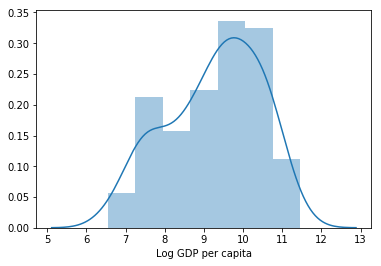

In [35]:
sns.distplot(log_gdp.dropna())

In [19]:
log_gdp=WHR18['Log GDP per capita']


In [22]:
pd.isna(log_gdp).sum()

9

ValueError: cannot convert float NaN to integer

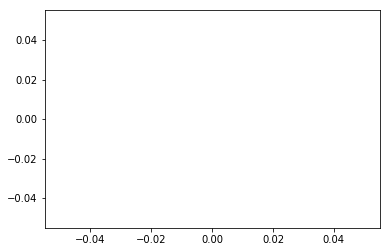

In [20]:
sns.distplot(log_gdp)

### Happiness Score:

In the Kaggle Data:
- Happiness Score is a metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest"'

- In the dataset on the WHR site, the 


The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 


>The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.




# Happiness Score

In [ ]:
whr19.sort_values(by='Happiness score', ascending=False)

In [ ]:
sns.distplot(whr19['Happiness score']);

# GDP per capita

The extent to which GDP contributes to the calculation  of the Happiness Score

In [ ]:
whr19.head()

In [ ]:
gdp= whr19['Explained by: GDP per capita']

In [ ]:
sns.distplot(whr19['Explained by: GDP per capita']);

In [ ]:
print(f"The minimum value of Explained by GDP per capita is {whr19['Explained by: GDP per capita'].min():.3f} while the maximum is {whr19['Explained by: GDP per capita'].max():.3f}")
      

In [ ]:
whr19['Explained by: GDP per capita'].describe()

# Histogram of GDP explained
A [histogram](https://seaborn.pydata.org/tutorial/distributions.html#histograms) represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin

In [ ]:
x = whr19['Explained by: GDP per capita']

In [ ]:
sns.distplot(x);

# KDE
A [Kernel Density Estimate](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation) can be a useful tool for plotting the shape of a distribution. Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis

In [ ]:

sns.distplot(x, hist=False, rug=True);

In [ ]:
from scipy import stats


In [ ]:
sns.kdeplot(x, shade=True);

[Fitting parametric distributions](https://seaborn.pydata.org/tutorial/distributions.html#fitting-parametric-distributions)
You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

In [ ]:
x.describe()

In [ ]:
#loc, scale,size =x.mean, x.std, x.count
loc, scale, size =x.mean(), x.std(), x.count()
#np.random.normal(loc,scale,size)

In [ ]:
x.mean()

In [ ]:
x1 =np.random.normal(loc,scale,size)

In [ ]:
sns.distplot(x)
sns.distplot(x1)